In [346]:
import scipy.io
import numpy as np
import scipy.optimize
import datetime 
import ephem
import random
from scipy import spatial
import matplotlib.pyplot as plt
%matplotlib
from astropy.table import Table
import astropy.units as u
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import astropy
from astropy.time import Time
from astropy.coordinates import EarthLocation
import sunpy.coordinates
from datetime import datetime, timezone
from math import atan, atan2, degrees, floor, pi, radians, sin, sqrt
from skyfield.api import earth, JulianDate, now, sun
%matplotlib inline
data=scipy.io.loadmat('BNS-sources-trial-10saleem.mat')['data'] 
#sourceparameters
DL=data[:,0]
theta=data[:,1]
phi=data[:,2]
print(len(DL),len(theta),len(phi))

Using matplotlib backend: MacOSX
220000 220000 220000


In [183]:
from astropy.time import Time
time1 = Time('2022-01-01T00:00:00.123456789') # ask gaurav why
time2 = Time('2023-01-01T00:00:00.123456789')
#%time homotime = Time(np.linspace(time1.jd, time2.jd, len(theta)), format="jd")
%time homotime = Time(np.random.uniform(low=time1.jd, high=time2.jd, size=len(theta)), format="jd").sort()

CPU times: user 162 ms, sys: 27.9 ms, total: 190 ms
Wall time: 187 ms


In [184]:
sunloc = astropy.coordinates.get_sun(homotime)  #getting loaction of sun with respect to earth

In [185]:
sunRA = sunloc.ra.deg  #sun's RA in earth's frame in degrees
sunDEC = sunloc.dec.deg #sun's DEC in earth's frame in degrees
sunDIST = sunloc.distance.AU*1.496e8 #sun distance from earth in km

In [187]:
f = np.linspace(0,220000,220000)  #for plotting

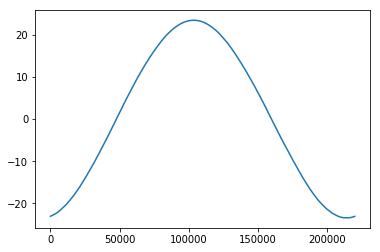

In [348]:
plt.plot(f,sunDEC)  #declination of sun w.r.t earth for 1 year

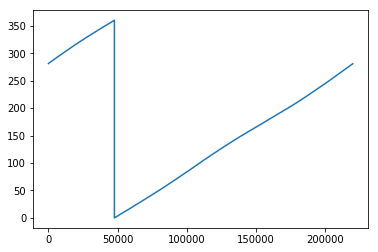

In [347]:
plt.plot(f,sunRA)   #RA of sun w.r.t earth for 1 year

In [335]:
def getxyz(theta,phi,n):
    theta = np.pi/2 - theta
    x=np.sin(theta)*np.cos(phi)
    y=np.sin(theta)*np.sin(phi)
    z=np.cos(theta)
    return x,y,z
def getnorm(vec):
    norm = np.linalg.norm(vec)
    #print (norm)
    return vec/norm

In [198]:
homotime.mjd[0],homotime.jd[0],homotime.iso[0]

(59580.0001222319, 2459580.500122232, '2022-01-01 00:00:10.561')

In [218]:
RA1 = np.empty(len(theta),dtype = object)
DEC1 = np.empty(len(theta),dtype = object)
satvecold = np.empty(length,dtype=object)

In [296]:
line0 = 'ASTROSAT' #Daksha
line1 = '1 40930U 15052A   22302.17850942  .00000772  00000-0  19439-4 0  9990'
line2 = '2 40930   5.9975   0.5159 0009292 339.1937  20.7998 14.76165238112787'
line3 = '2 40930   5.9975   0.5159 0009292 339.1937 200.7998 14.76165238112787'

# line0 = 'SWIFT'#BAT
# line1 = '1 28485U 04047A   22302.18405080  .00001301  00000-0  60140-4 0  9997'
# line2 = '2 28485  20.5572 277.8742 0011565 130.4507 229.6936 15.03911323708409'
# line0 = 'FGRST (GLAST)'#Fermi
# line1 = '1 33053U 08029A   22100.45970249  .00000511  00000-0  12538-4 0  9998'
# line2 = '2 33053  25.5819 140.4060 0012690 120.1881 239.9912 15.11069703542313'
astrosat1 = ephem.readtle(line0,line1,line2)
#astrosat2 = ephem.readtle(line0,line1,line3)

sublat1 = np.empty(len(theta),dtype = object)
sublong1 = np.empty(len(theta),dtype = object)
#sublat2 = np.empty(len(theta),dtype = object)
#sublong2 = np.empty(len(theta),dtype = object)
for i in range(len(theta)):
    time = str(homotime.iso[i])
    astrosat1.compute(time)
    #astrosat2.compute(time)
    sublat1[i] = (astrosat1.sublat)#sublat in radians
    sublong1[i] = (astrosat1.sublong)#sublong in radian
    #sublat2[i] = (astrosat2.sublat)#sublat in radians
    #sublong2[i] = (astrosat2.sublong)#sublong in radian
    RA1[i] = np.rad2deg(astrosat1.ra)
    DEC1[i] = (astrosat1.dec)
    s = (getnorm(getxyz(astrosat1.sublat,astrosat1.sublong,1)))  #satellites coordinates, i.e 'unit' vector w.r.t earth
    satvecold[i] = np.array([s[0]*7000,s[1]*7000,s[2]*7000])  #satellite vector

In [203]:
plt.plot(f[0:557],RA1[0:557],color="green")
plt.xlabel("1 day",color="blue")
plt.ylabel("Right ascension in degree (in degree)",color="blue")
plt.title("DAKSHA",color="blue")
#plt.savefig("RA_satellite.pdf")

Text(0.5,1,'DAKSHA')

In [205]:
plt.plot(homotime.value[0:557],DEC1[0:557],"green")
plt.xlabel("1 day",color="blue")
plt.ylabel("Declination or Latitude (in degree)",color="blue")
plt.title("DAKSHA",color="blue")
#plt.savefig("Declination_satellite.pdf")

Text(0.5,1,'DAKSHA')

In [214]:
homotimeISO = homotime.iso

In [56]:
length = 220000

In [278]:
dt = np.empty(length,dtype=object)
for i in range(0,length):
    temp = homotimeISO[i]
    year = int(temp[0:4])
    month = int(temp[5:7])
    day = int(temp[8:10])
    hour = int(temp[11:13])
    minu = int(temp[14:16])
    secs = int(temp[17:19])
    dt[i] = datetime(year,month,day,hour,minu,secs)

In [334]:
positionSUN = -1*earth(JulianDate(utc=dt)).observe(sun).apparent().position.km

/anaconda3/lib/python3.6/site-packages/skyfield/relativity.py:127: RuntimeWarning: divide by zero encountered in true_divide
  qhat = pq / qmag
/anaconda3/lib/python3.6/site-packages/skyfield/relativity.py:127: RuntimeWarning: invalid value encountered in true_divide
  qhat = pq / qmag


## SUN

In [294]:
x = np.empty(length-1,dtype=object)
y = np.empty(length-1,dtype=object)
z = np.empty(length-1,dtype=object)
xaxis = np.empty(length-1,dtype=object)

for i in range(0,length-1):
    #time0 = datetime.datetime(2000, 1, 1, 12, 0, 0)
    #time = datetime(2022, 1, 1, tzinfo=timezone.utc)
    x[i]=positionSUN[0][i]
    y[i]=positionSUN[1][i]
    z[i]=positionSUN[2][i]
    x1 = positionSUN[0][i+1]
    y1 = positionSUN[1][i+1]
    z1 = positionSUN[2][i+1]
    xaxis[i] = x1-x[i],y1-y[i],z1-z[i]
    

' year = int(temp[0:4])\n    month = int(temp[5:7])\n    day = int(temp[8:10])\n    hour = int(temp[11:13])\n    minu = int(temp[14:16])\n    secs = int(temp[17:19])'

In [297]:
sunsat = np.empty(length,dtype=object)
for i in range(0,length-1):
    sunsat[i] = x[i]+satvecold[i][0],y[i]+satvecold[i][1],z[i]+satvecold[i][2]

In [298]:
decsun = np.empty(length,dtype=object)
for i in range(0,length-1):
    norm1 = (x[i]**2+y[i]**2+z[i]**2)**0.5
    norm2 = (sunsat[i][0]**2+sunsat[i][1]**2+sunsat[i][2]**2)**0.5
    decsun[i] = np.arccos((x[i]*sunsat[i][0]+y[i]*sunsat[i][1]+z[i]*sunsat[i][2])/(norm1*norm2))*180/np.pi

In [330]:
plt.plot(f[0:length-1],decsun[0:length-1])
plt.xticks([0,50000,110000,160000,219999],['Jan','Mar','Jun','Sep','Dec'])
#plt.xticks([0,100,200,300,400,500,610],['00:00','04:11','07:35','11:34','15:00','19:22','23:52'])
plt.title("Daksha's DEC w.r.t sun")
plt.xlabel("1 Year(time)")
plt.ylabel("DEC in degrees")
#plt.savefig("DEC_Dakshawrtsunforoneday.pdf")

Text(0,0.5,'DEC in degrees')

In [331]:
projsunsatonxy = np.empty(length,dtype=object)
rightascension = np.empty(length,dtype=object)
for i in range(0,length-1):
    sindel = np.sin(decsun[i]*np.pi/180)
    projsunsatonxy[i] = sindel*sunsat[i][0],sindel*sunsat[i][1],sindel*sunsat[i][2]
    norm1 = (projsunsatonxy[i][0]**2+projsunsatonxy[i][1]**2+projsunsatonxy[i][2])**0.5
    norm2 = (xaxis[i][0]**2+xaxis[i][1]**2+xaxis[i][2]**2)**0.5
    rightascension[i] = np.arcsin((projsunsatonxy[i][0]*xaxis[i][0]+projsunsatonxy[i][1]*xaxis[i][1]+projsunsatonxy[i][2]*xaxis[i][2])/(norm1*norm2))*180/np.pi

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [332]:
plt.plot(f[0:length-1],rightascension[0:length-1])
plt.title("Daksha's RA w.r.t sun")
#plt.xticks([0,100,200,300,400,500,610],['00:00','04:11','07:35','11:34','15:00','19:22','23:52'])
plt.xlabel("1 Day(time)")
plt.ylabel("RA in degrees")
#plt.savefig("RA_Dakshawrtsunforoneday.pdf")

Text(0,0.5,'RA in degrees')

In [311]:
def function(theta,x):
    return x-np.sin(theta)

In [327]:
angle = np.empty(length,dtype=object)
guess = 0
for i in range(length-1):
    norm1 = (projsunsatonxy[i][0]**2+projsunsatonxy[i][1]**2+projsunsatonxy[i][2])**0.5
    norm2 = (xaxis[i][0]**2+xaxis[i][1]**2+xaxis[i][2]**2)**0.5
    x = (projsunsatonxy[i][0]*xaxis[i][0]+projsunsatonxy[i][1]*xaxis[i][1]+projsunsatonxy[i][2]*xaxis[i][2])/(norm1*norm2)
    #if x>1:
    #   x=1
    angle[i] = scipy.optimize.fsolve(function,guess,args=x)[0]*180/np.pi
    guess += np.pi/120000

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [326]:
plt.plot(f[0:length-1],angle[0:length-1])
plt.title("Daksha's RA w.r.t sun")
plt.xlabel("1 year")
plt.ylabel("RA in degrees")
plt.savefig("RA_dakshawrtsun.pdf")

In [345]:
plt.plot(f[0:557],(RA1)[0:557])